In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt




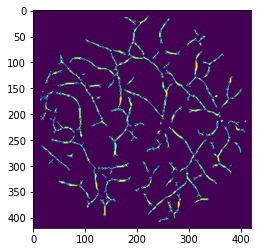

In [78]:
img1 = cv2.imread('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\skel_db\\skel_11.bmp')
img2 = cv2.imread('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\skel_db\\skel_22.bmp')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img1_gray)
plt.imshow(img2_gray)

In [79]:
orb = cv2.ORB_create()

In [80]:
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

single_match = matches[0]
single_match.distance

18.0

In [81]:
matches = sorted(matches,key=lambda x:x.distance)

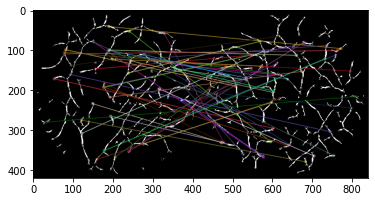

In [82]:
orb_matches =cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)
cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\u_templates\\ORB_b.png', orb_matches)

plt.imshow(orb_matches)

In [83]:
# Create our ORB detector and detect keypoints and descriptors
sift = cv2.xfeatures2d.SIFT_create()

In [84]:
# Find the key points and descriptors with ORB
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()

In [85]:
matches = bf.knnMatch (descriptors1, descriptors2,k=2)

In [86]:
descriptors1

array([[ 21.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   1.,   0.,   0.],
       [ 23.,  65.,  36., ...,   0.,   0.,   0.],
       ...,
       [  0.,   1.,   0., ...,  22.,   2.,  10.],
       [  0.,  21., 114., ...,   0.,   0.,   0.],
       [  3.,   7.,   1., ...,  51.,  18.,   6.]], dtype=float32)

In [87]:
descriptors2

array([[ 6.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  1.,  0., ...,  0.,  0.,  0.],
       [12.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [37., 74., 11., ...,  0.,  0.,  0.],
       [56., 87.,  9., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ..., 10.,  0.,  0.]], dtype=float32)

In [88]:
matches

[[<DMatch 0000027DFA88C230>, <DMatch 0000027DFAD813D0>],
 [<DMatch 0000027DFB5C2270>, <DMatch 0000027DFB5C2050>],
 [<DMatch 0000027DFB5C22D0>, <DMatch 0000027DFB5C2250>],
 [<DMatch 0000027DFADBA450>, <DMatch 0000027DFADBAD90>],
 [<DMatch 0000027DFADBABF0>, <DMatch 0000027DFADBAB90>],
 [<DMatch 0000027DFADBA590>, <DMatch 0000027DFADBA3B0>],
 [<DMatch 0000027DFADBA890>, <DMatch 0000027DFADBACD0>],
 [<DMatch 0000027DFADBA930>, <DMatch 0000027DFADBAB50>],
 [<DMatch 0000027DFADBA4D0>, <DMatch 0000027DFADBA570>],
 [<DMatch 0000027DFADBAC50>, <DMatch 0000027DFADBA810>],
 [<DMatch 0000027DFADBAC10>, <DMatch 0000027DFADBA9B0>],
 [<DMatch 0000027DFADBA8F0>, <DMatch 0000027DFADBA170>],
 [<DMatch 0000027DFADBA4F0>, <DMatch 0000027DFADBAC70>],
 [<DMatch 0000027DFADBADF0>, <DMatch 0000027DFADBAF70>],
 [<DMatch 0000027DFADBAF50>, <DMatch 0000027DFADBA370>],
 [<DMatch 0000027DFADBABB0>, <DMatch 0000027DFADBA9D0>],
 [<DMatch 0000027DFADBAB70>, <DMatch 0000027DFADBAE70>],
 [<DMatch 0000027DFADBAED0>, <D

In [89]:
AA1 = matches[131][0]
AA1.distance

102.17142486572266

In [90]:
AA2 = matches[131][1]
AA2.distance

111.59300994873047

In [91]:
BB1 = matches[1][0]
BB1.distance

160.875732421875

In [92]:
BB2 = matches[1][1]
BB2.distance

185.96774291992188

In [93]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6*m2.distance:
    good_matches.append([m1])

In [94]:
good_matches

[[<DMatch 0000027DFADE9B10>]]

In [95]:
AA1 = matches[131][0]
AA1.distance

102.17142486572266

In [96]:
AA2 = matches[131][1]
AA2.distance

111.59300994873047

In [97]:
BB1 = matches[1][0]
BB1.distance

160.875732421875

In [98]:
BB2 = matches[1][1]
BB2.distance

185.96774291992188

In [99]:
len(matches)

534

In [100]:
len(good_matches)

1

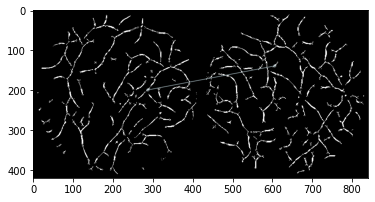

In [101]:
SIFT_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\u_templates\\SIFT_b.png', SIFT_matches)

plt.imshow(SIFT_matches)

In [102]:
sift = cv2.xfeatures2d.SIFT_create()

In [103]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [104]:
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

In [105]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [106]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6 * m2.distance:
    good_matches.append([m1])
len(good_matches)

1

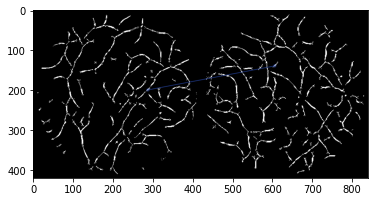

In [107]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\u_templates\\FLAN_b.png', flann_matches)

plt.imshow(flann_matches)

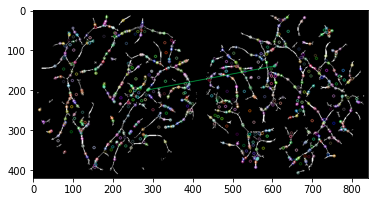

In [108]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=0)
cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\templates\\ident_four_template.png', flann_matches)

plt.imshow(flann_matches)

In [109]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch (descriptors1, descriptors2, k=2)

In [110]:
matchesMask = [[0,0] for i in range(len(matches))]

In [111]:
matchesMask

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [112]:
for i,(m1, m2) in enumerate (matches):
  if m1.distance < 0.5 * m2.distance:
    matchesMask[i] = [1,0]

In [113]:
draw_params = dict (matchColor = (0,0,255), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=2 )

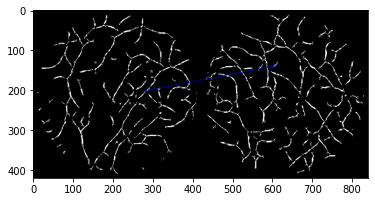

In [114]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None,**draw_params)
cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\templates\\ident_five_template.png', flann_matches)

plt.imshow(flann_matches)